In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from ipywidgets import interact

Survey results of 1,500 remote workers from the Australian state of New South Wales, taken in August-September 2020 and March-April 2021, which aimed to capture the shift in remote work experiences and attitudes during different stages of the COVID-19 pandemic and gain insights on its long term implications.

In [160]:
data_dir = '../data/'

In [161]:
df_2020 = pd.read_csv(data_dir + '2020_rws.csv', encoding='cp1252')

In [162]:
df_2020.shape

(1507, 73)

### Examining distribution of null responses

<Axes: >

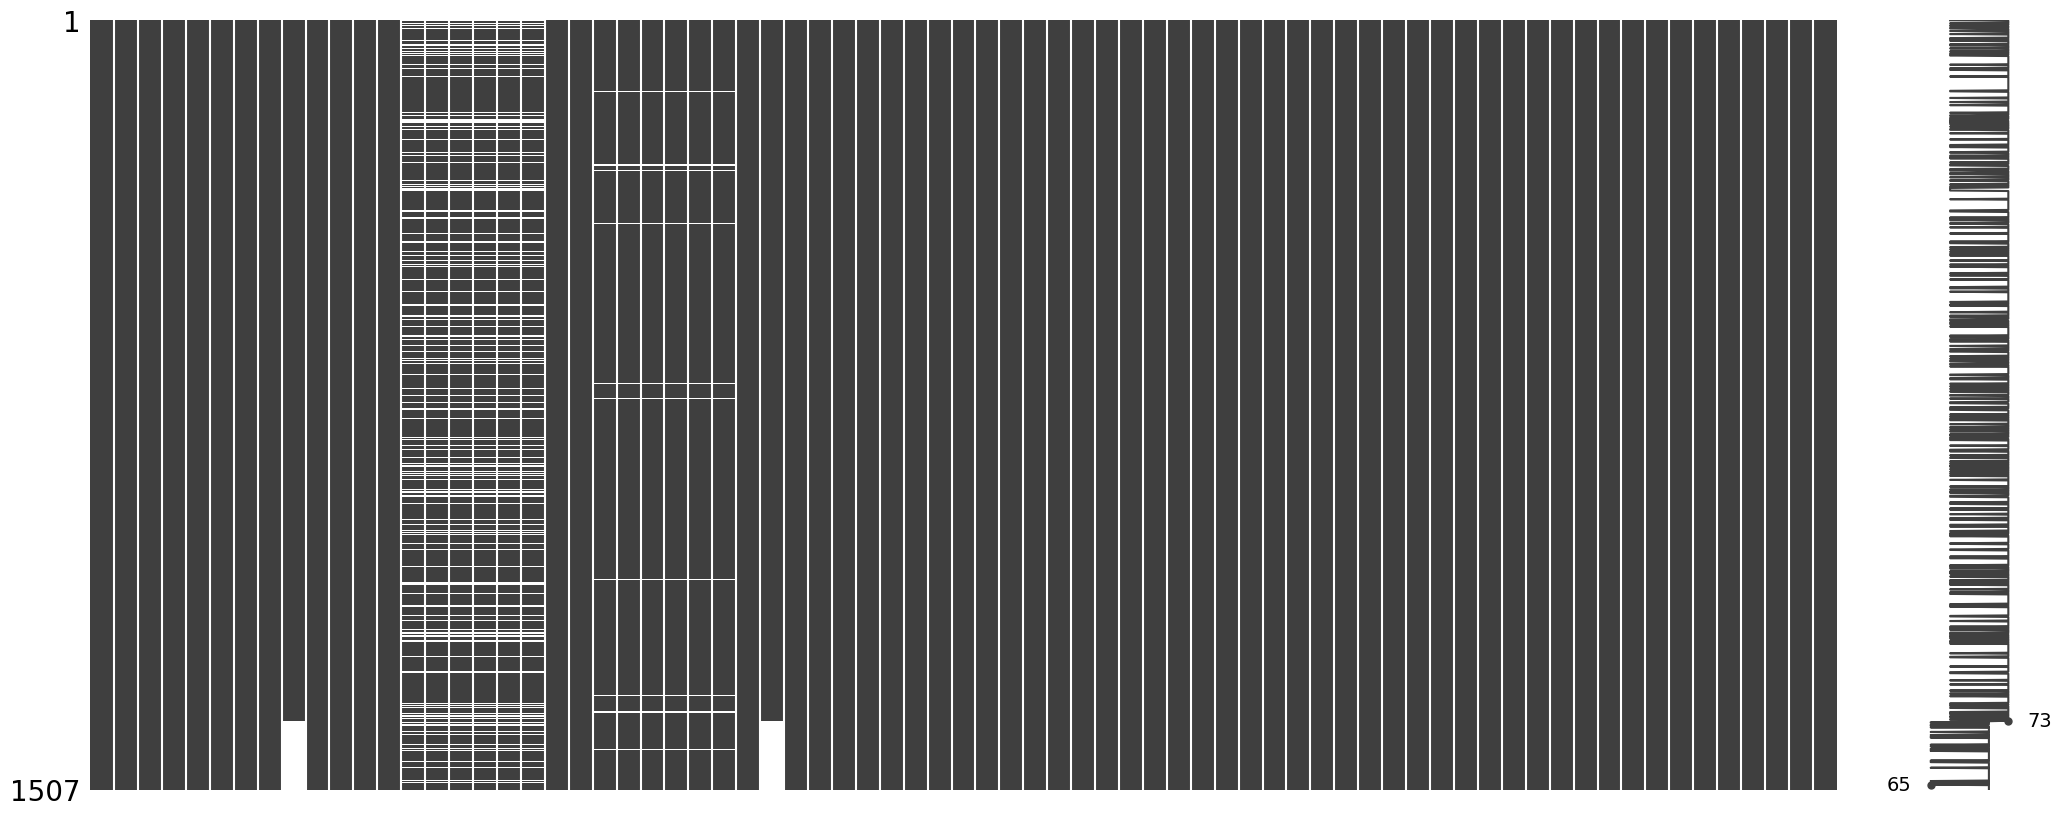

In [163]:
msno.matrix(df_2020)

In [164]:
rename_map = {
    'What is your gender?' : 'gender',
    'Which of the following best describes your industry?' : 'industry_1'
}

In [165]:
df_2020.rename(rename_map, axis=1, inplace=True)

### Exploring some basic elements of the person responding

In [166]:
df_2020['age'] = 2020 - df_2020['What year were you born?']

In [167]:
df_2020['age'].describe()

count    1507.000000
mean       45.208361
std        11.875588
min        19.000000
25%        35.000000
50%        45.000000
75%        55.000000
max       120.000000
Name: age, dtype: float64

In [168]:
df_2020 = df_2020.drop(df_2020[df_2020['age'] > 90].index)

In [169]:
df_2020[df_2020['gender'] != 'Male']['gender']

0       Female
3       Female
10      Female
12      Female
13      Female
         ...  
1496    Female
1497    Female
1499    Female
1503    Female
1505    Female
Name: gender, Length: 659, dtype: object

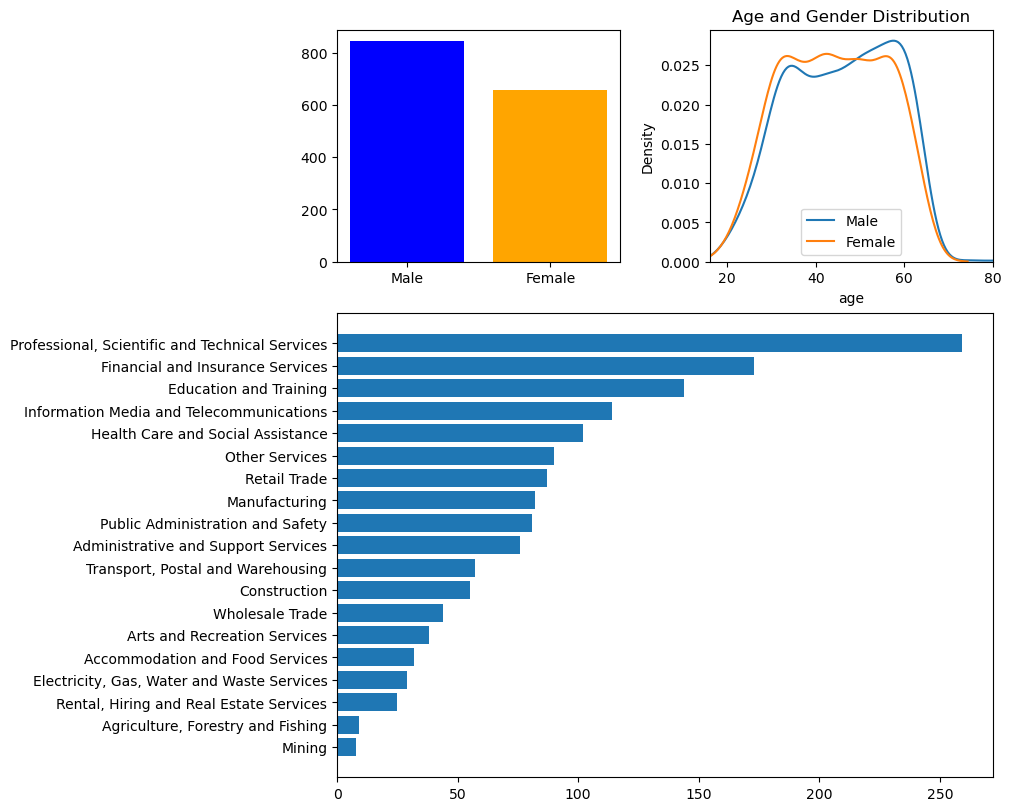

In [170]:

fig, axs = plt.subplot_mosaic([['a', 'b'], ['c', 'c'], ['c', 'c']], layout='constrained')
fig.set_figheight(8)
fig.set_figwidth(10)


gender_heights = [ df_2020[df_2020['gender'] == 'Male'].shape[0], df_2020[df_2020['gender'] == 'Female'].shape[0] ]
axs['a'].bar( ['Male', 'Female'], gender_heights, color = ['blue', 'orange'])

sns.kdeplot(df_2020[df_2020['gender'] == 'Male']['age'], label = 'Male', ax=axs['b'] )
sns.kdeplot(df_2020[df_2020['gender'] == 'Female']['age'], label = 'Female', ax=axs['b'] )
axs['b'].set_xlim(16, 80)
axs['b'].legend()
axs['b'].set_title("Age and Gender Distribution")

ind = { industry : df_2020[df_2020['industry_1'] == industry].shape[0] for industry in df_2020['industry_1'].unique()}
reverse_ind = {v:k for (k,v) in ind.items()}
sorted_ind = { reverse_ind[i] : i for i in sorted(reverse_ind)}
axs['c'].barh(list(sorted_ind.keys()), width = sorted_ind.values(), height = 0.8);